In [3]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [4]:
model =  None
data_dir = r'Dataset/Bindata/'
image_h = 224
image_w = 224
batch_s = 32
image_size = (image_h, image_w)  
save_model_path = r"models/Custom_Bin_best_weights.h5"

Found 19986 files belonging to 2 classes.
Using 15989 files for training.
Found 19986 files belonging to 2 classes.
Using 3997 files for validation.
Classes détectées : ['No_photos', 'Photo']


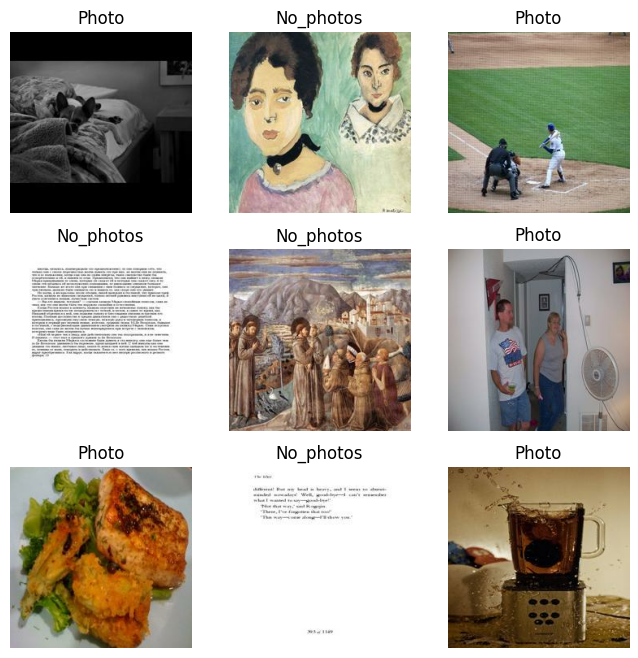

In [5]:
preprocess_images(data_dir)
# Jeu d'entraînement (80% des données)
train_set, test_set = prepare_data(data_dir  )
class_names = test_set.class_names
print("Classes détectées :", class_names)

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):  
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i].numpy()])  
        plt.axis("off") 
plt.show()

Verifier les classes :

In [6]:
model = Create_Sequential((image_h , image_w  , 3 ) , len(class_names)  , ShowSummary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                          

In [24]:
with tf.device('/GPU:1'):
    history = TrainModel(
    model=model,
    train_set=train_set,
    test_set=test_set,
    nbEpochs=100,
    UseEarlyStopping=True , 
    modelCheckpoint=save_model_path
    )

Poids chargés depuis 'models/Custom_Bin_best_weights.h5'.
Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8442
Epoch 1: val_loss improved from inf to 0.34104, saving model to models\Custom_Bin_best_weights.h5
500/500 [==============================] - 201s 396ms/step - loss: 0.3616 - accuracy: 0.8442 - val_loss: 0.3410 - val_accuracy: 0.8544
Epoch 2/100
500/500 [==============================] - ETA: 0s - loss: 0.3265 - accuracy: 0.8573
Epoch 2: val_loss improved from 0.34104 to 0.29578, saving model to models\Custom_Bin_best_weights.h5
500/500 [==============================] - 206s 412ms/step - loss: 0.3265 - accuracy: 0.8573 - val_loss: 0.2958 - val_accuracy: 0.8762
Epoch 3/100
500/500 [==============================] - ETA: 0s - loss: 0.3017 - accuracy: 0.8687
Epoch 3: val_loss did not improve from 0.29578
500/500 [==============================] - 199s 398ms/step - loss: 0.3017 - accuracy: 0.8687 - val_loss: 0.3372 - val_accuracy: 0.8764

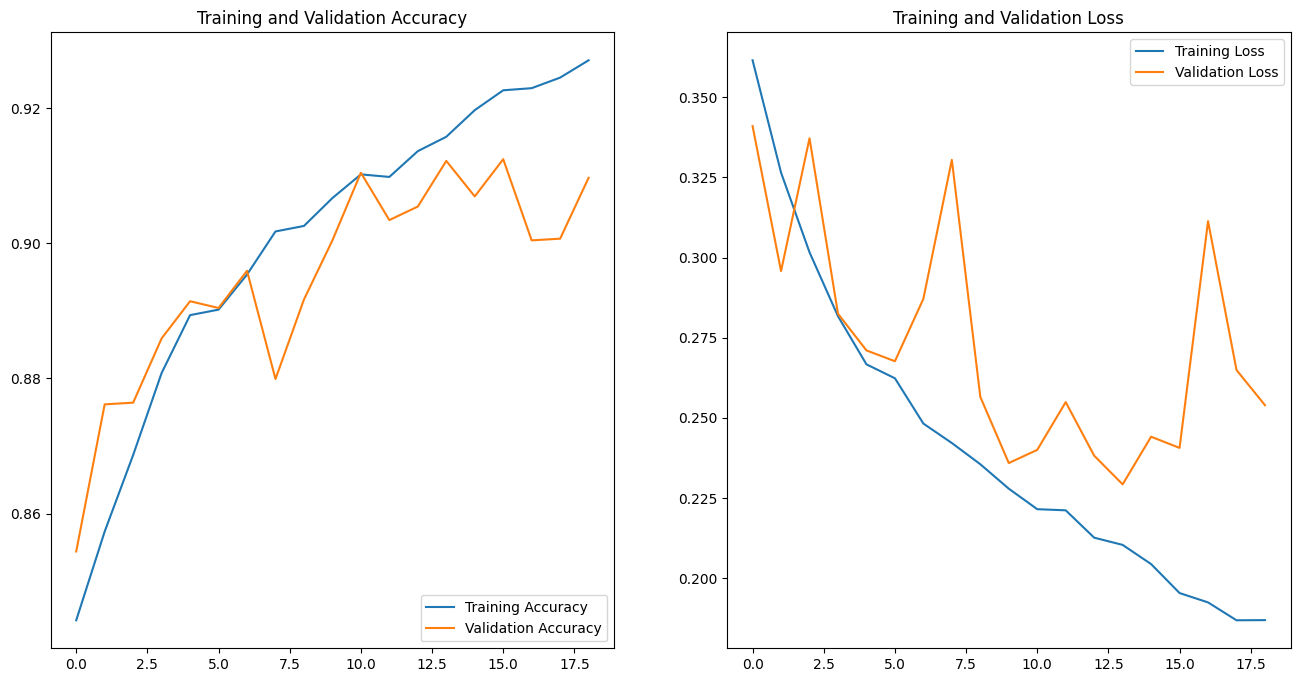

In [25]:
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

1/1 [==============================] - 0s 123ms/step
Vérification des lignes (%): [100. 100.]


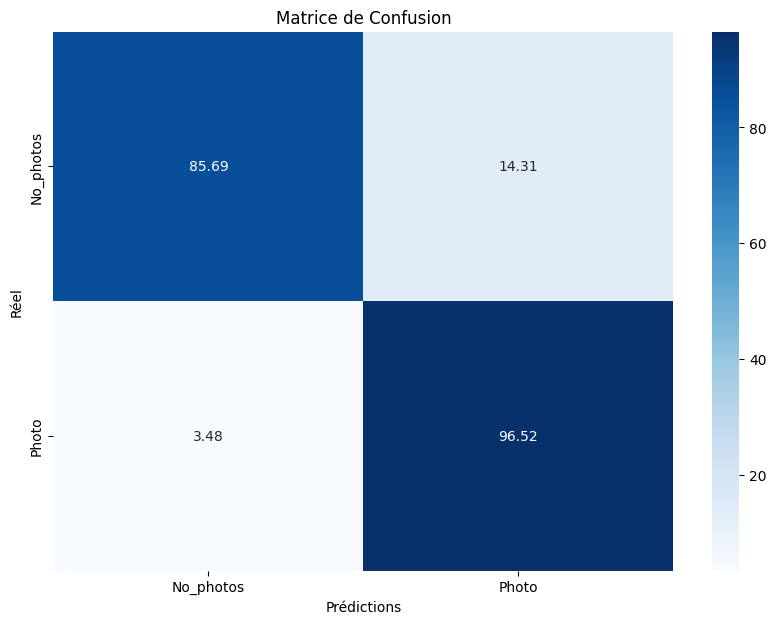

In [26]:
plot_confusion_matrix(model ,test_set , class_names)

Poids chargés avec succès depuis models/Custom_Bin_best_weights.h5
Modèle compilé avec succès.
1/1 [==============================] - 0s 25ms/step


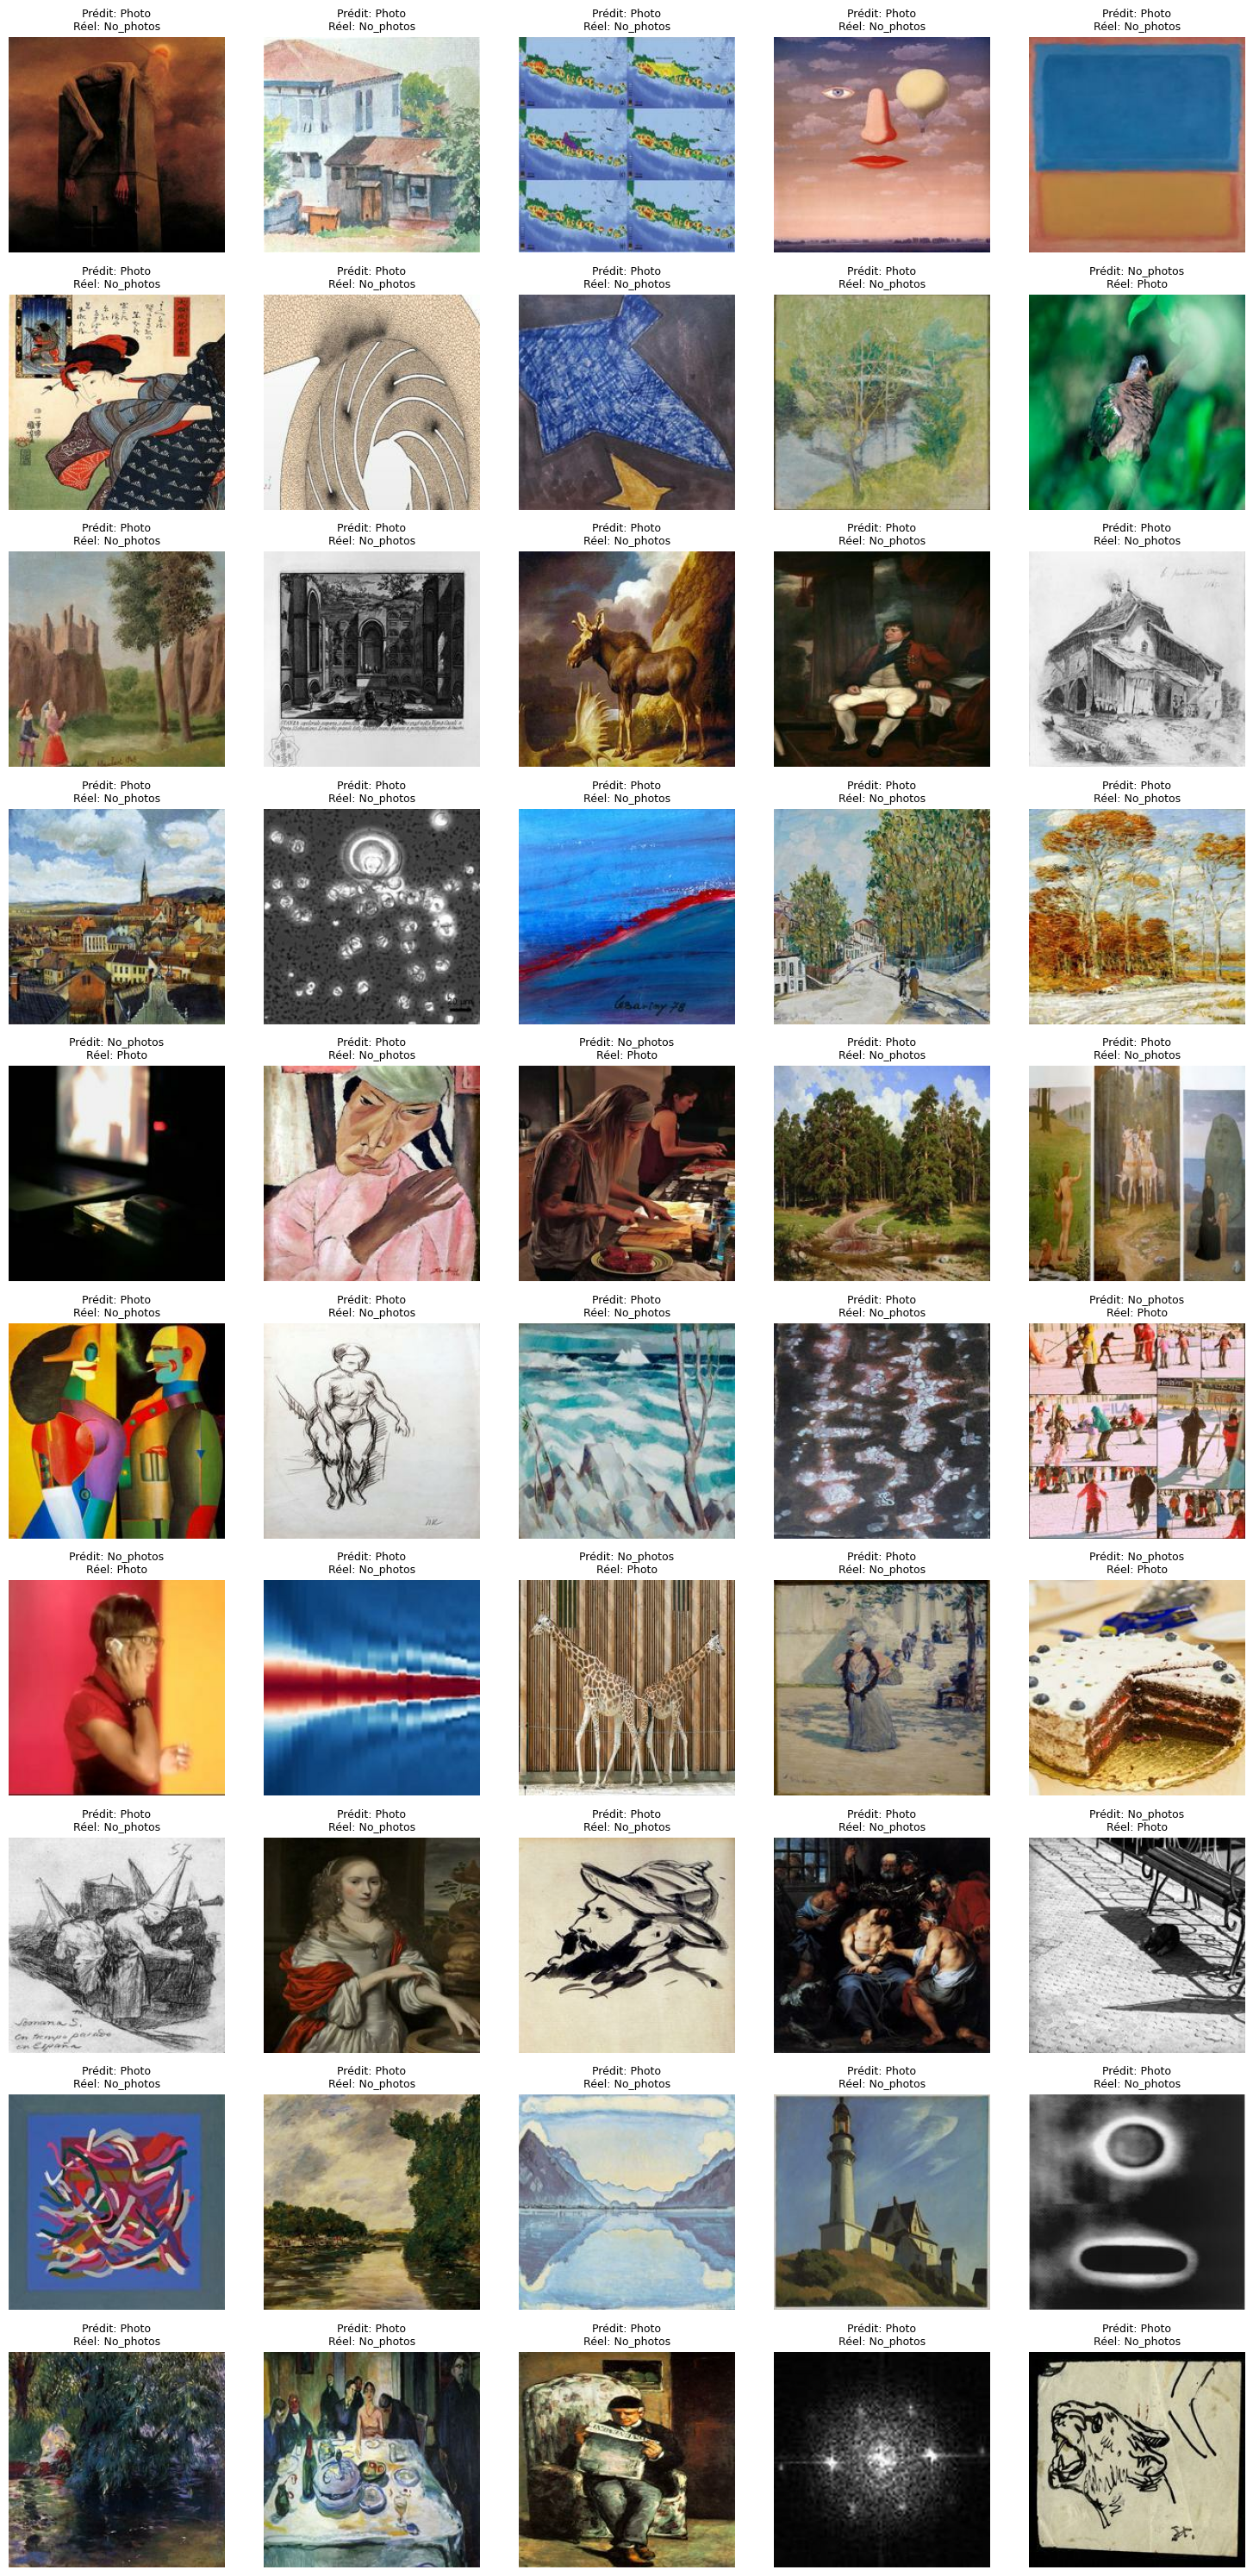

In [8]:
load_model_from_weights_and_compile(model , save_model_path)
show_misclassified_images(model , test_set , class_names ,max_images= 50)

125/125 [==============================] - 4s 27ms/step - loss: 0.2292 - accuracy: 0.9122
Évaluation sur le jeu de test - Accuracy: 0.91, Loss: 0.2292
1/1 [==============================] - 0s 34ms/step
Classe prédite: Photo avec une confiance de 0.60


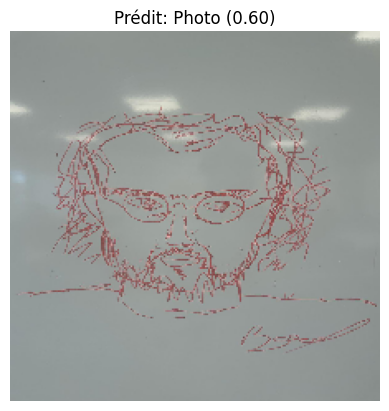

125/125 [==============================] - 3s 26ms/step - loss: 0.2292 - accuracy: 0.9122
Évaluation sur le jeu de test - Accuracy: 0.91, Loss: 0.2292
1/1 [==============================] - 0s 17ms/step
Classe prédite: Photo avec une confiance de 0.71


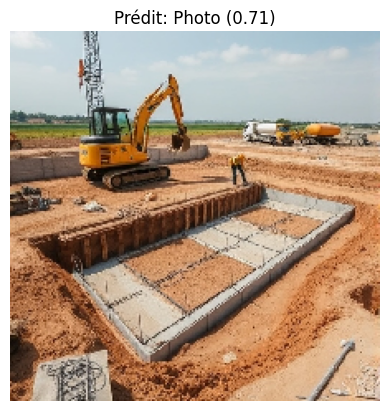

125/125 [==============================] - 3s 27ms/step - loss: 0.2292 - accuracy: 0.9122
Évaluation sur le jeu de test - Accuracy: 0.91, Loss: 0.2292
1/1 [==============================] - 0s 22ms/step
Classe prédite: Photo avec une confiance de 0.91


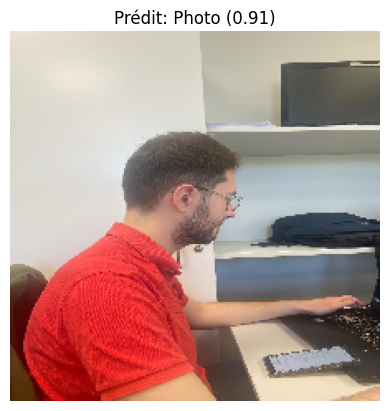

125/125 [==============================] - 3s 27ms/step - loss: 0.2292 - accuracy: 0.9122
Évaluation sur le jeu de test - Accuracy: 0.91, Loss: 0.2292
1/1 [==============================] - 0s 21ms/step
Classe prédite: No_photos avec une confiance de 1.00


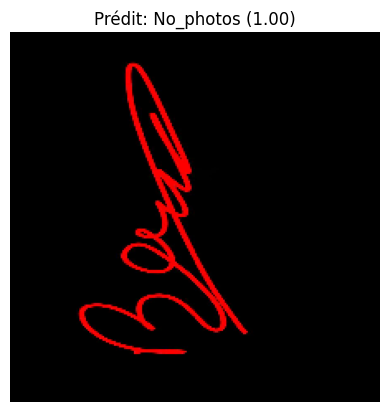

125/125 [==============================] - 4s 27ms/step - loss: 0.2292 - accuracy: 0.9122
Évaluation sur le jeu de test - Accuracy: 0.91, Loss: 0.2292
1/1 [==============================] - 0s 22ms/step
Classe prédite: No_photos avec une confiance de 1.00


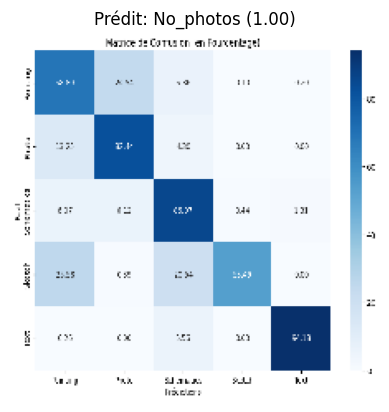

In [27]:
with tf.device('/GPU:1'):
    model.load_weights(save_model_path)
    test_model(model, test_set, "testResult/lorenzo.jpg", class_names  , image_size )
    test_model(model, test_set, "testResult/7b3cb7d3-c8e0-4852-97df-017ceac60c23.jpeg", class_names , image_size)
    test_model(model, test_set, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_57384aa3.jpg", class_names , image_size)
    test_model(model, test_set, "testResult/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(model, test_set, "testResult/output.png", class_names , image_size)